# Use the Marketing Analytics dataset file and answer the following

1. Read the dataset as a pandas dataframe.
2. Identify features that contain outliers by plotting them
3. Remove outliers in the Income column and replace the null values with the mean
4. Create a new column and add the total of the amount spent
5. Create a new column with the total of purchases from the different channels (web,catalogue, instore, deals)
6. Find whether there exists any relationship between age and income using visualization
7. Remove the unwanted columns and save it as a new dataset.

1. Read the dataset as a pandas dataframe.

In [71]:
import pandas as pd
data=pd.read_csv('Marketing Analytics.csv')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2027 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

2. Identify features that contain outliers by plotting them

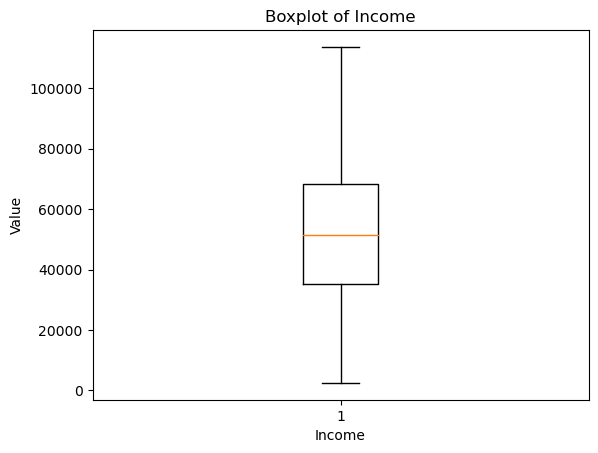

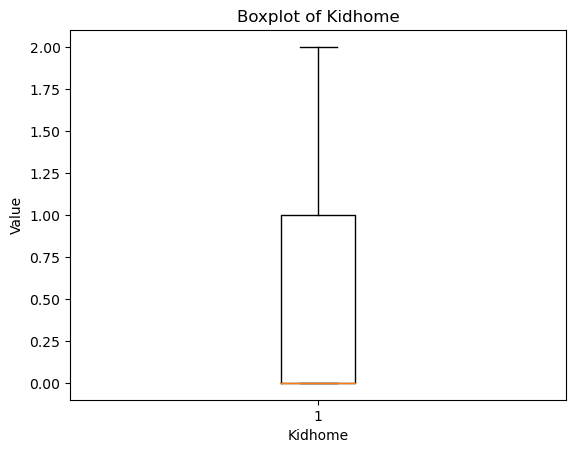

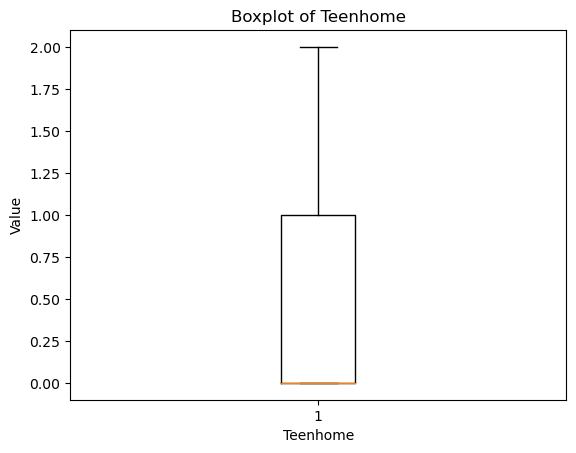

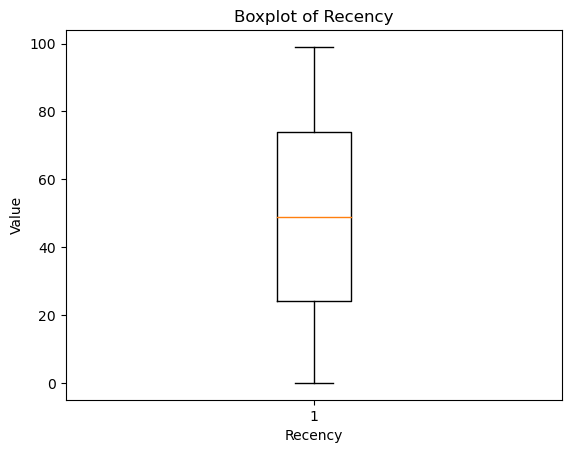

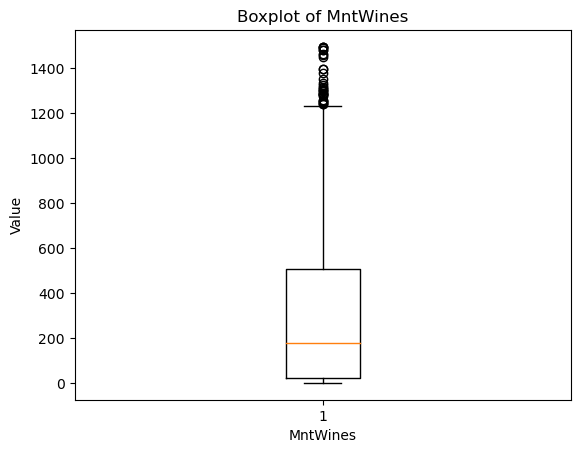

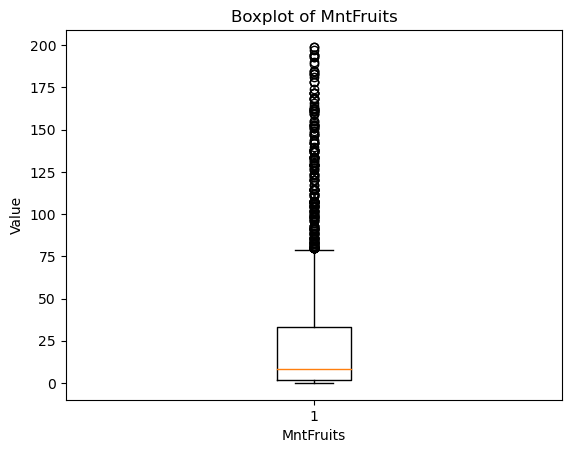

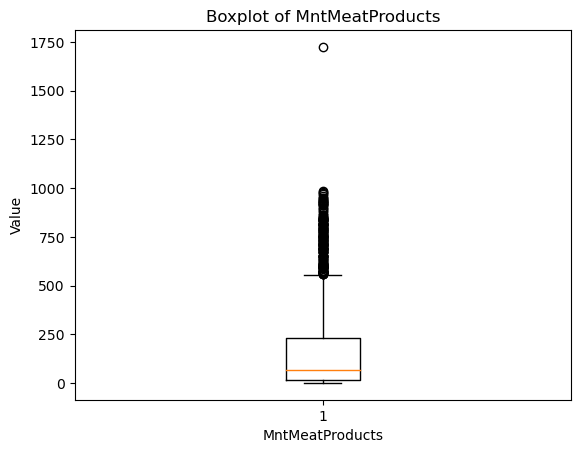

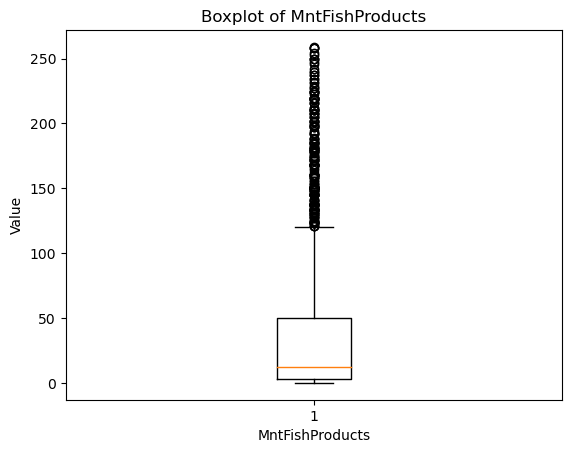

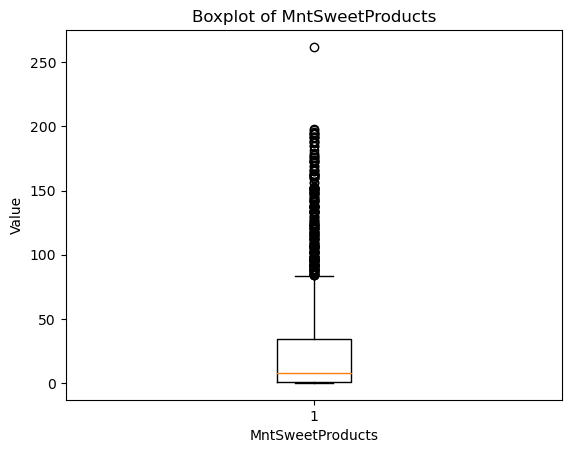

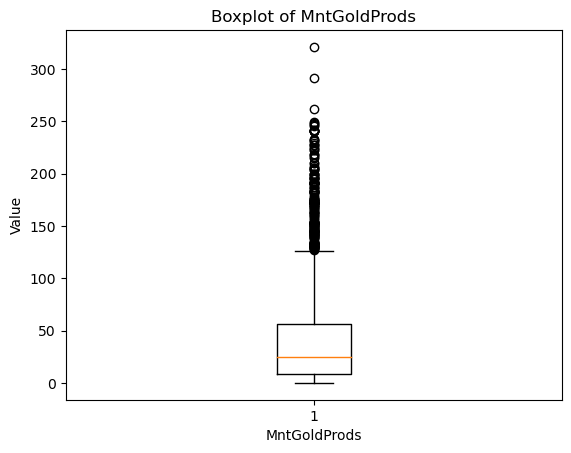

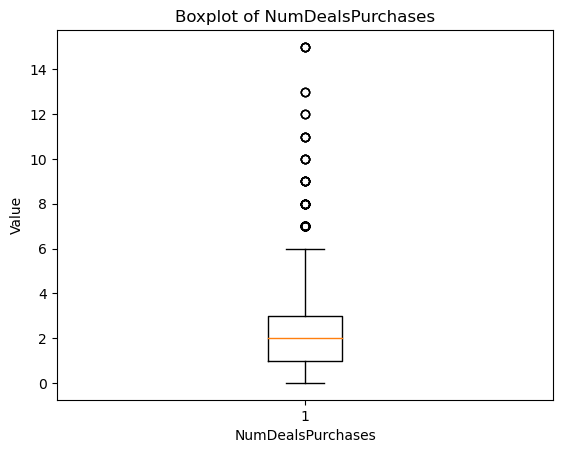

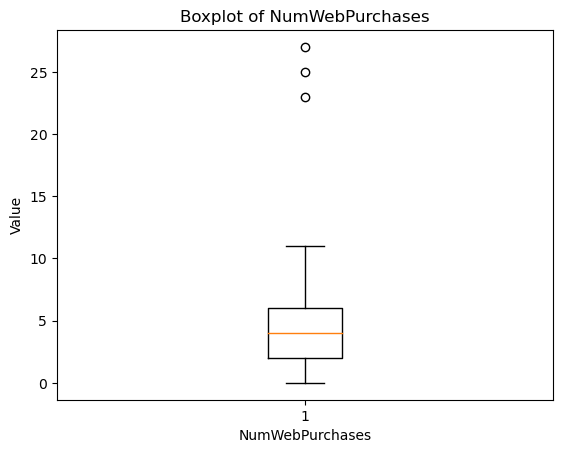

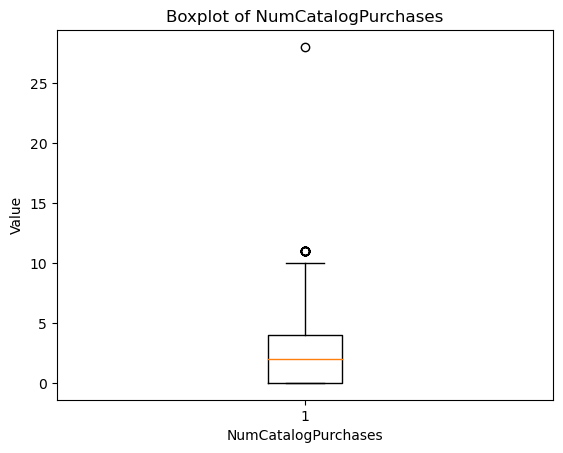

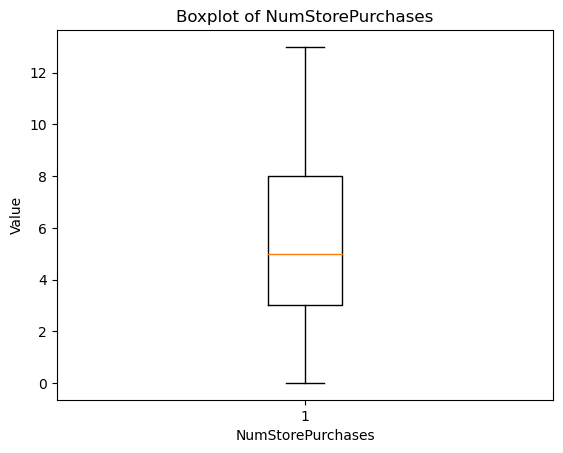

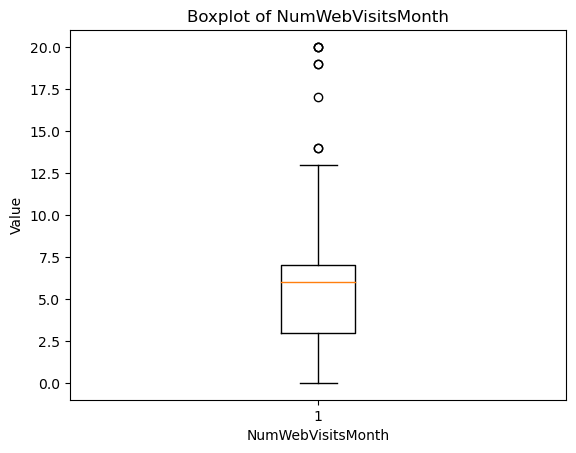

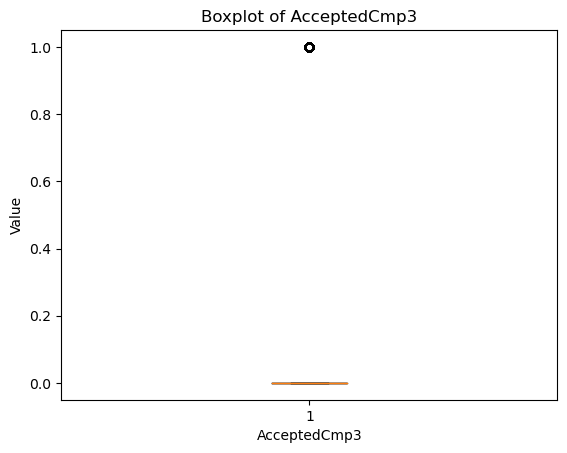

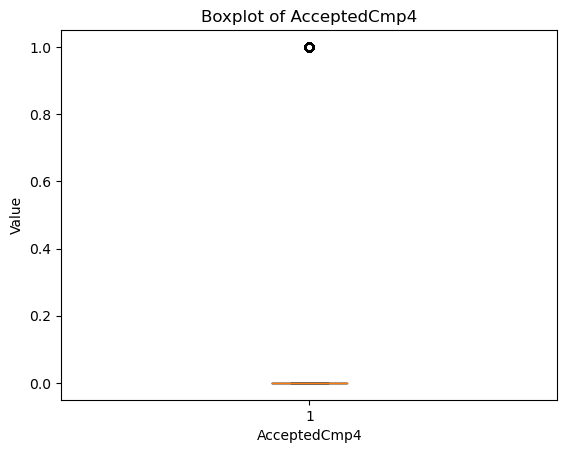

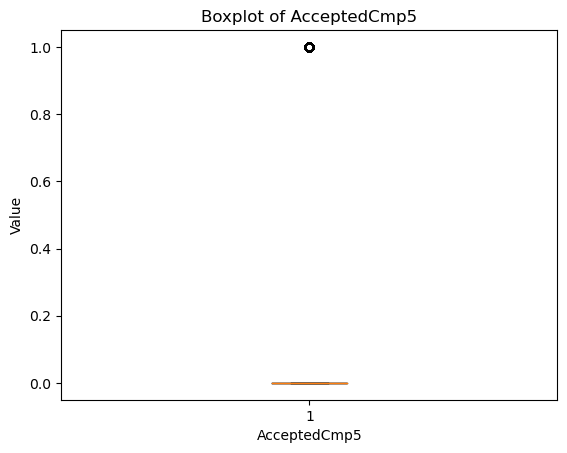

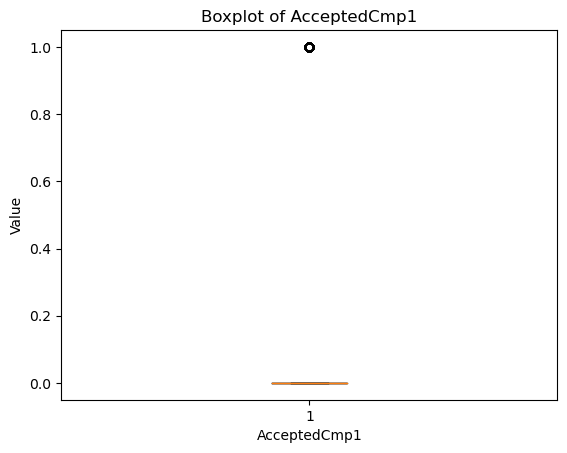

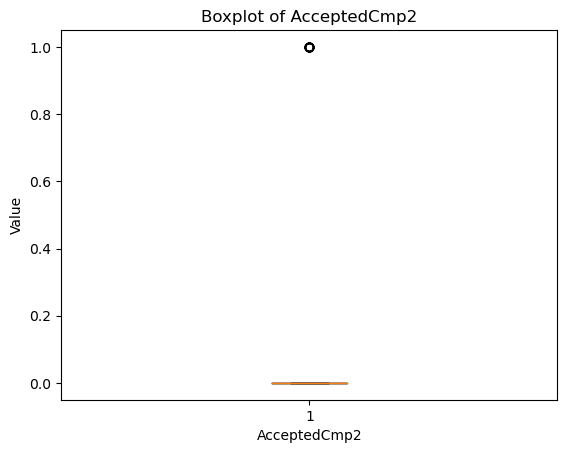

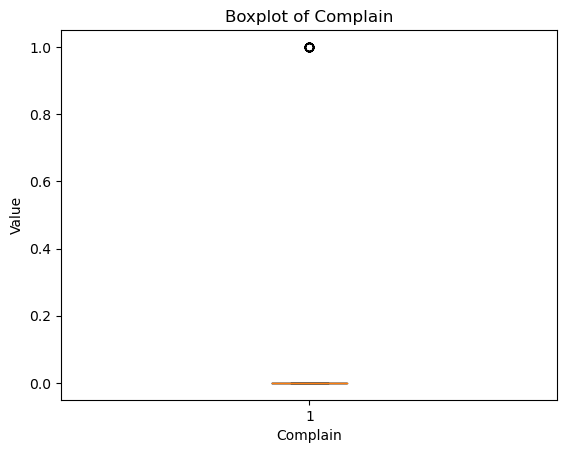

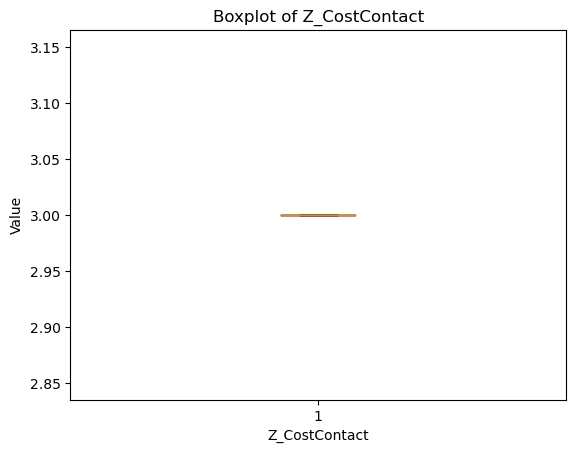

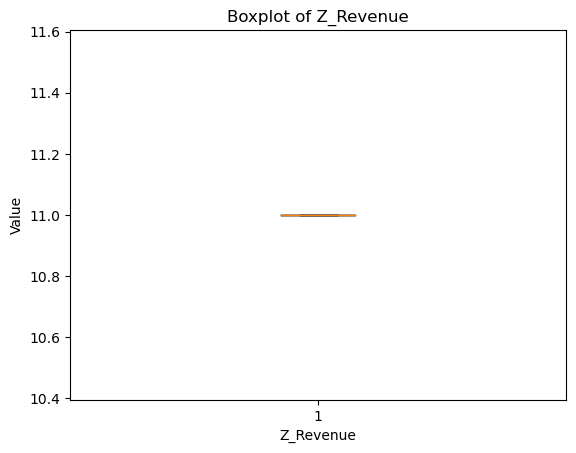

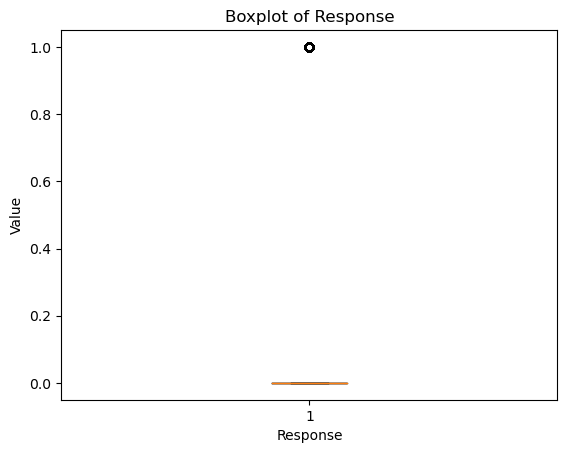

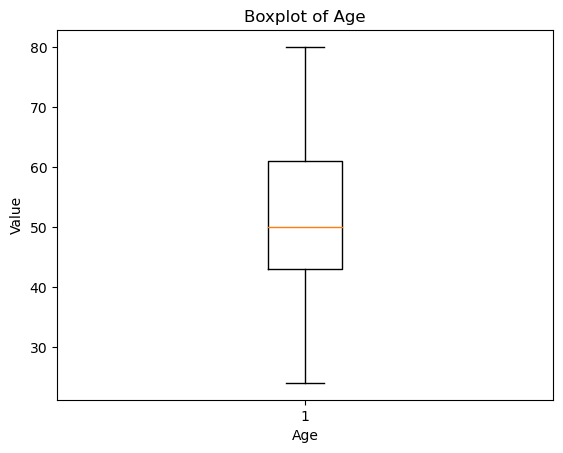

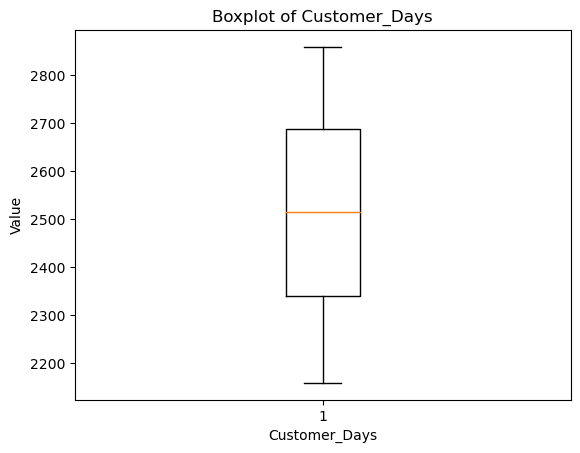

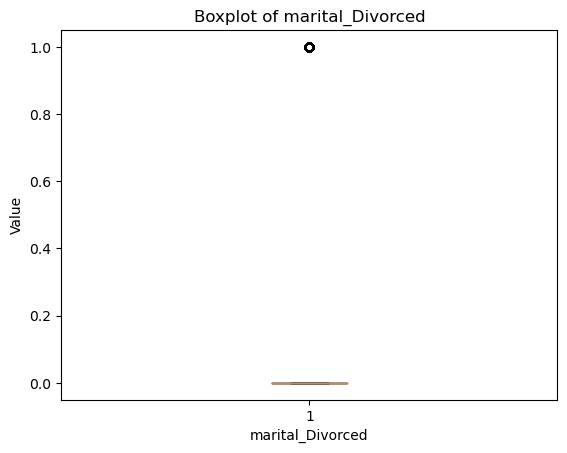

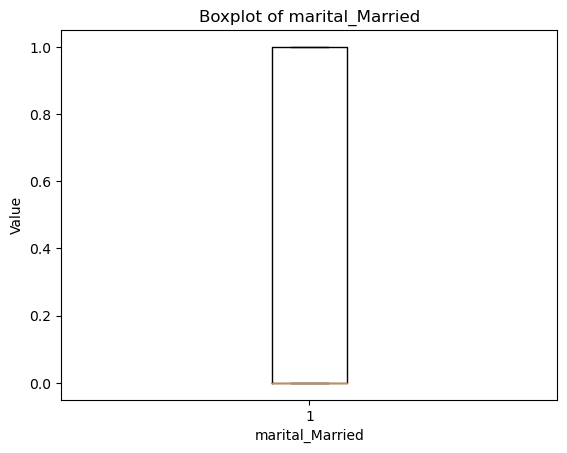

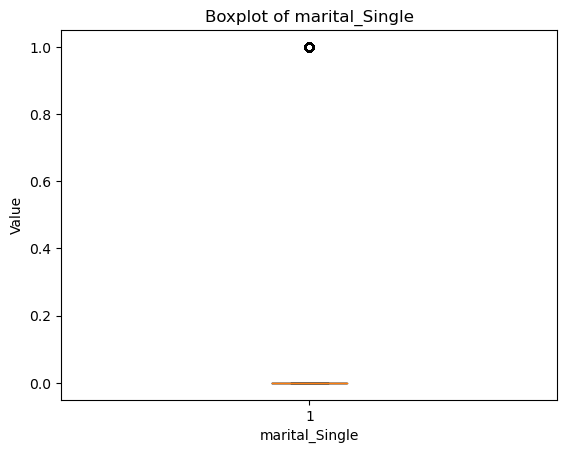

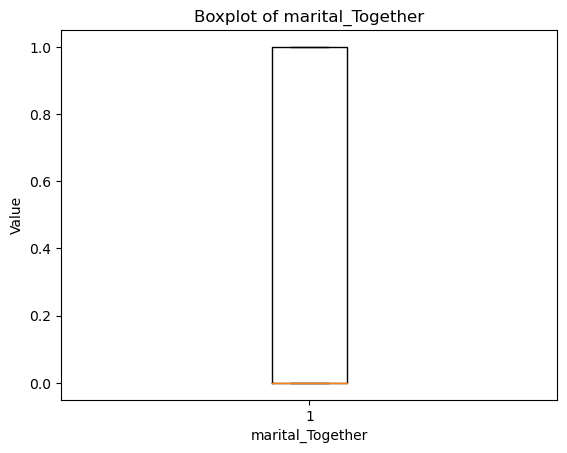

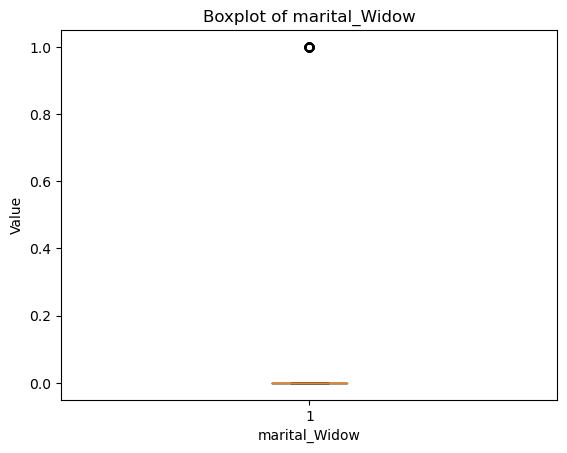

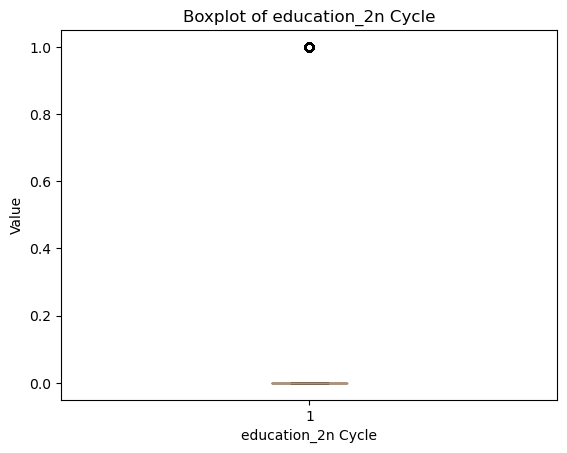

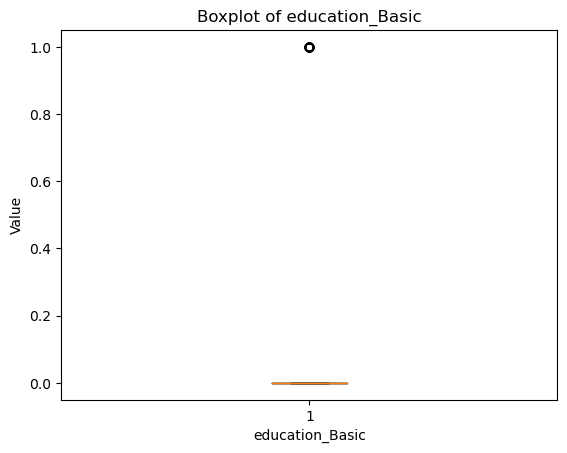

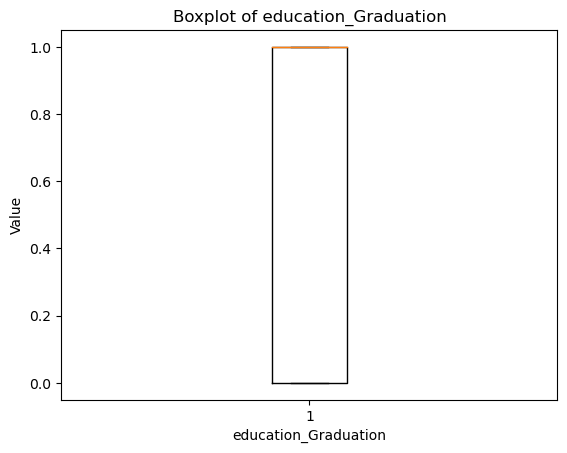

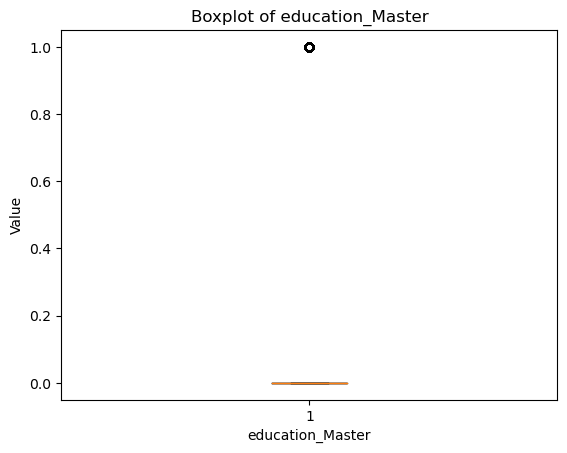

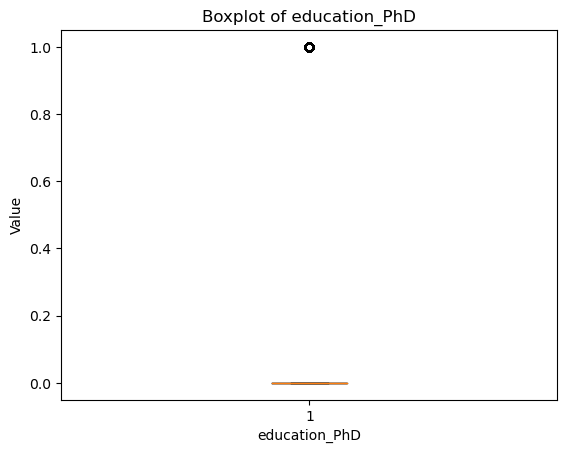

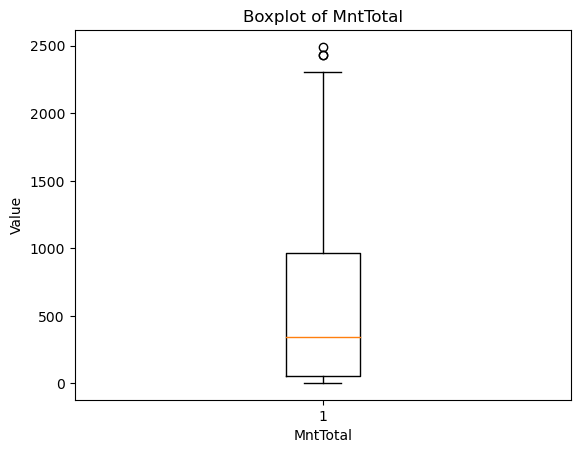

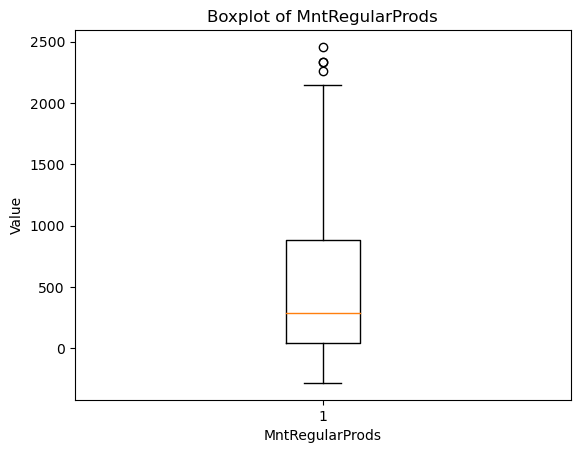

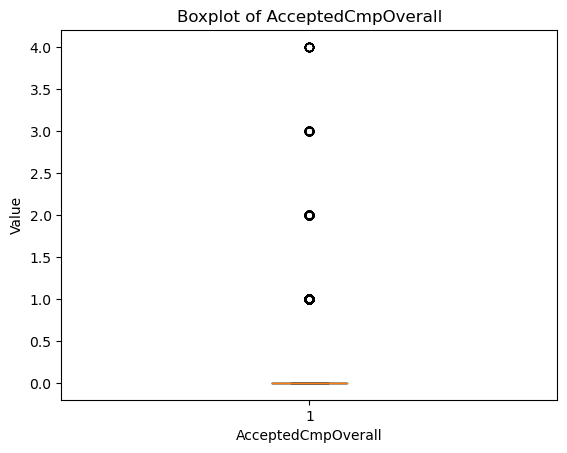

In [73]:
import matplotlib.pyplot as plt
columns=data.select_dtypes(include=['int64','float64']).columns
for column in columns:
    plt.boxplot(data[column].dropna())
    plt.xlabel(f"{column}")
    plt.ylabel("Value")
    plt.title(f"Boxplot of {column}")
    plt.show()

3. Remove outliers in the Income column and replace the null values with the mean

In [74]:
df=data.dropna()
#df['Income']=df['Income'].transform(lambda x:x.fillna(x.mean()))
df['Income'].fillna(df['Income'].mean()).head(10)

1     46344.0
2     71613.0
3     26646.0
4     58293.0
5     62513.0
6     55635.0
8     30351.0
9      5648.0
10     7500.0
11    63033.0
Name: Income, dtype: float64

In [75]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [76]:
def IQR(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    return iqr,q1,q3

In [77]:
iqr,q1,q3=IQR(df,'Income')

In [78]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr

In [79]:
data_inc=df[(df['Income']>lower) & (df['Income']<upper)]

<Axes: >

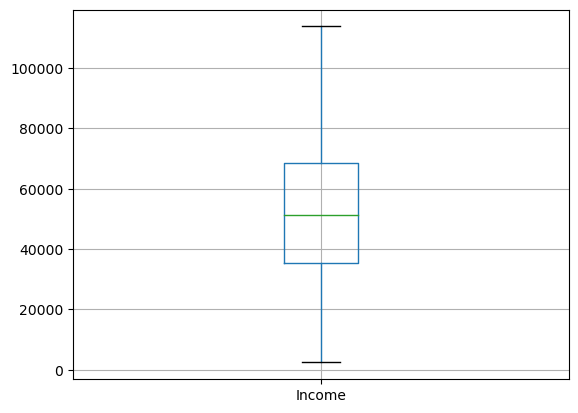

In [80]:
df.boxplot('Income')

4. Create a new column and add the total of the amount spent

In [81]:
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

/var/folders/3b/zd9fg_651mj7zpycrcszs1zh0000gp/T/ipykernel_6487/4282918033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [82]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalSpent
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,27
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,776
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,53
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,422
5,62513.0,0,1,16,520,42,98,0,42,14,...,0,0,0,0,1,0,702,688,0,716


5. Create a new column with the total of purchases from the different channels (web,catalogue, instore, deals)

In [83]:
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']+df['NumWebVisitsMonth'] 

/var/folders/3b/zd9fg_651mj7zpycrcszs1zh0000gp/T/ipykernel_6487/1240016237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']+df['NumWebVisitsMonth']


In [84]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalSpent,TotalPurchases
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,27,11
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,776,25
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,53,14
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,422,24
5,62513.0,0,1,16,520,42,98,0,42,14,...,0,0,0,1,0,702,688,0,716,28


6. Find whether there exists any relationship between age and income using visualization

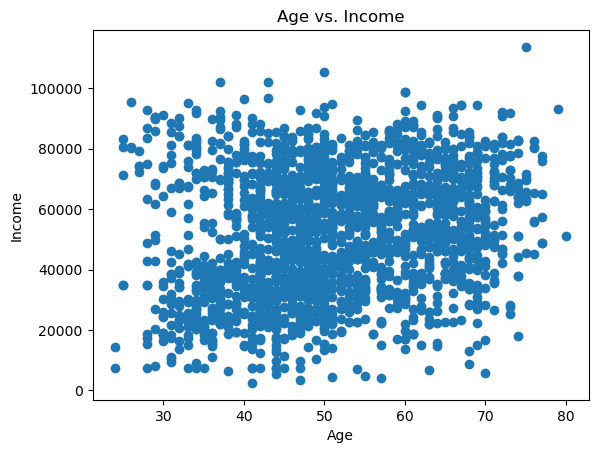

In [85]:
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()

7. Remove the unwanted columns and save it as a new dataset.

In [86]:
unwanted_columns = ['Z_CostContact', 'Z_Revenue']
df_cleaned = df.drop(unwanted_columns, axis=1)
df_cleaned.to_csv('marketing_data_cleaned.csv', index=False)

In [87]:
df_cleaned.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalSpent,TotalPurchases
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,27,11
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,776,25
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,53,14
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,422,24
5,62513.0,0,1,16,520,42,98,0,42,14,...,0,0,0,1,0,702,688,0,716,28


# Use the housing data 1 and housing data 2 and answer the following


1. Read the datasets a pandas dataframe.
2. Merge the two dataframes into a single dataframe. Try all 4 types of joins and store the results as separate dataframes.
3. Remove the duplicate values from ID column.
4. Drop the latitude and longitude columns.
5. Plot histograms of any 5 features
6. Create a scatter plot and check if there is any relationship between the housing_median_age and median_house_value.
7. Perform bivariate analysis for these two columns.

1. Read the datasets a pandas dataframe.

In [89]:
import pandas as pd
df1 = pd.read_csv('California Housing Data 1.csv')
df2 = pd.read_csv('California Housing Data 2.csv')

In [90]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20640 non-null  int64  
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  int64  
 4   total_rooms         20640 non-null  int64  
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.1 MB


In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20640 non-null  int64  
 1   households          20640 non-null  int64  
 2   median_income       20640 non-null  float64
 3   median_house_value  20640 non-null  int64  
 4   ocean_proximity     20640 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 806.4+ KB


2. Merge the two dataframes into a single dataframe. Try all 4 types of joins and store the results as separate dataframes.

In [92]:
df=pd.merge(df1,df2,how='inner')

In [93]:
pd.merge(df1,df2,how='outer')

,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,12792,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,438,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,438,-122.22,37.86,21,7099,1106.0,2401,310,5.5362,195600,INLAND
3,438,-117.53,33.83,7,2191,324.0,1156,1138,8.3014,358500,NEAR BAY
4,438,-117.53,33.83,7,2191,324.0,1156,310,5.5362,195600,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
41711,5647,-121.32,39.29,11,2640,505.0,1257,445,3.5673,112000,INLAND
41712,319,-121.40,39.33,15,2655,493.0,1200,432,3.5179,107200,INLAND
41713,1975,-121.56,39.27,28,2332,395.0,1041,344,3.7125,116800,INLAND
41714,8018,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND


In [94]:
pd.merge(df1,df2,how='left')

,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,12792,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,438,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,438,-122.22,37.86,21,7099,1106.0,2401,310,5.5362,195600,INLAND
3,12739,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
4,17304,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
41711,2200,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
41712,5385,-121.32,39.43,18,1860,409.0,741,166,1.3578,147500,NEAR BAY
41713,5385,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
41714,4330,-121.24,39.37,16,2785,616.0,1387,279,4.5764,207000,<1H OCEAN


In [95]:
pd.merge(df1,df2,how='right')

,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,12792,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,438,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,438,-117.53,33.83,7,2191,324.0,1156,1138,8.3014,358500,NEAR BAY
3,12739,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
4,17304,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
41711,2200,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
41712,5385,-122.27,37.85,40,751,184.0,409,349,1.8672,84700,INLAND
41713,5385,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
41714,4330,-117.25,33.19,18,1891,306.0,830,530,2.3886,89400,INLAND


3. Remove the duplicate values from ID column.

In [96]:
df.drop_duplicates(subset='ID',inplace=True)

In [97]:
df

,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,12792,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,438,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
5,12739,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
6,17304,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
10,16921,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
41711,5647,-121.32,39.29,11,2640,505.0,1257,445,3.5673,112000,INLAND
41712,319,-121.40,39.33,15,2655,493.0,1200,432,3.5179,107200,INLAND
41713,1975,-121.56,39.27,28,2332,395.0,1041,344,3.7125,116800,INLAND
41714,8018,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND


4. Drop the latitude and longitude columns.

In [98]:
df.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [99]:
df.head()

,ID,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,12792,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,438,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
5,12739,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
6,17304,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
10,16921,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


5. Plot histograms of any 5 features

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12949 entries, 0 to 41715
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  12949 non-null  int64  
 1   housing_median_age  12949 non-null  int64  
 2   total_rooms         12949 non-null  int64  
 3   total_bedrooms      12818 non-null  float64
 4   population          12949 non-null  int64  
 5   households          12949 non-null  int64  
 6   median_income       12949 non-null  float64
 7   median_house_value  12949 non-null  int64  
 8   ocean_proximity     12949 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1011.6+ KB


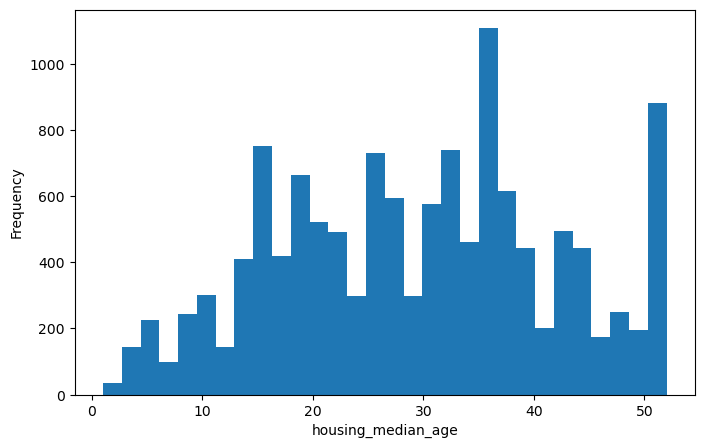

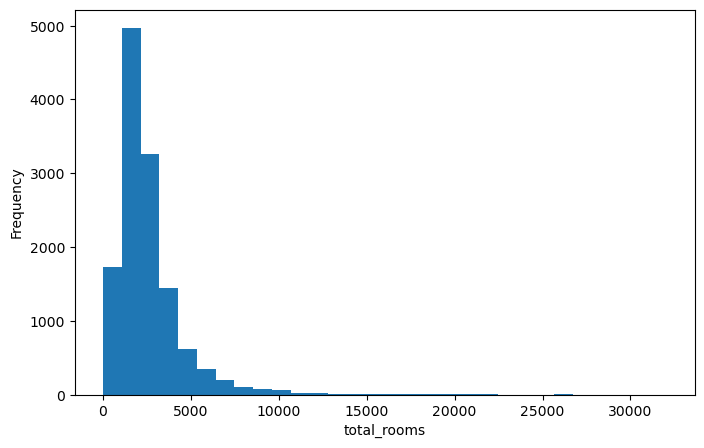

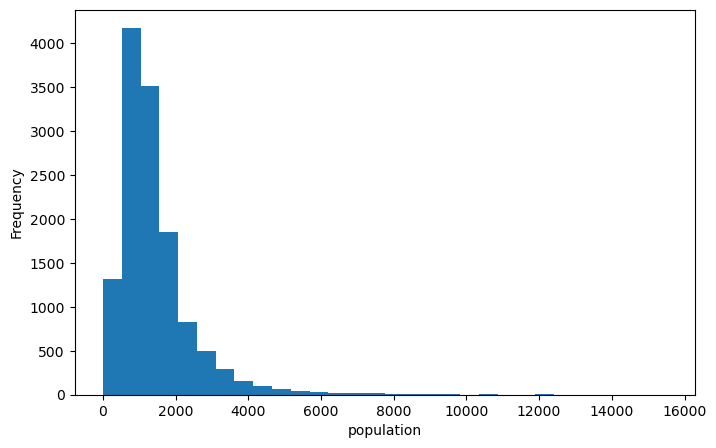

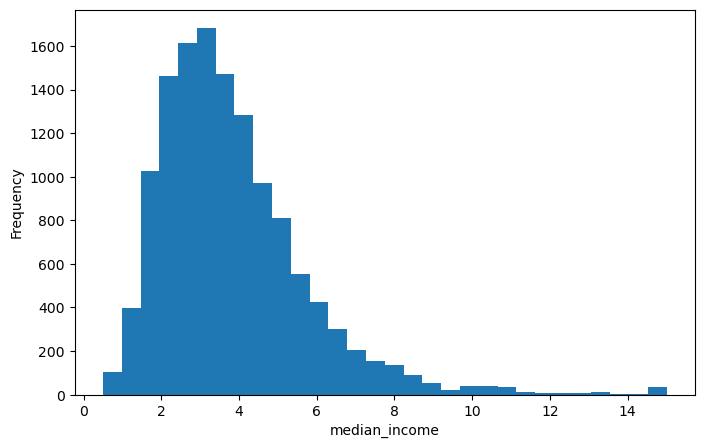

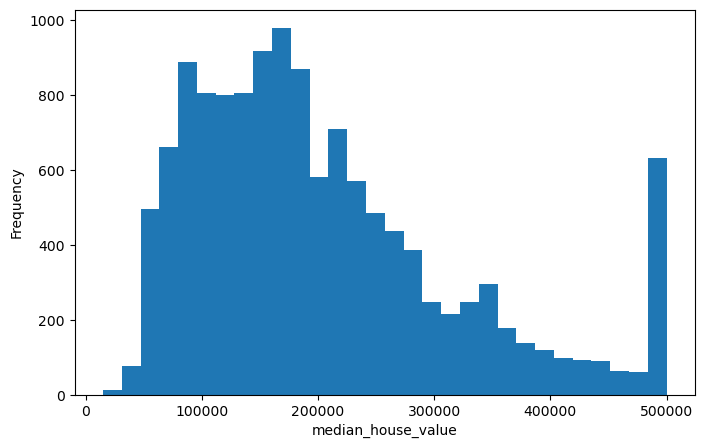

In [101]:
import matplotlib.pyplot as plt

columns_to_plot = ['housing_median_age', 'total_rooms', 'population', 'median_income', 'median_house_value']

for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


6. Create a scatter plot and check if there is any relationship between the housing_median_age and median_house_value.

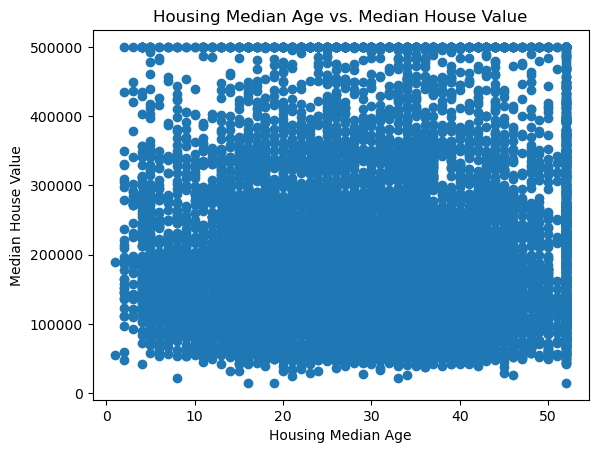

In [102]:
plt.scatter(df['housing_median_age'], df['median_house_value'])
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('Housing Median Age vs. Median House Value')
plt.show()

7. Perform bivariate analysis for these two columns.

Since the points are scattered randomly there is not a strong relationship between them